In [1]:
import pandas as pd
import networkx as nx
import hashlib
import numpy as np

# A method that gives the maximum PageRank list of a graph file

def getMaximumPageRankList(filename):

  file_ = open(filename, 'r')




  graphList = []
  ultimate_graphList = []  
  graphCounter = 0
  while True: 
  
    # Get next line from file 
      line = file_.readline() 
  
    # if line is empty 
    # end of file is reached 
      if not line: 
          break
    

    
      graph_number = line[0:12]
    
      if graph_number == "Graph Number":
      #print(graph_number+str(graphCounter))
        graphCounter += 1
        line = file_.readline()
        line = file_.readline()
        line = file_.readline()
        line = file_.readline()

        if graphCounter >= 2:
          ultimate_graphList.append(graphList)
          graphList = []


    
      list1 = line.split()
      graphList.append(list1)



  ultimate_graphList.append(graphList)
    
  file_.close()

  list_All_Feature_Set = []
 
  filetowrite = filename[:-4]+"_Pagerank_Median.txt"
  file1 = open(filetowrite,'w')

  graphNumber = len(ultimate_graphList)
# Iterating every graph
  for i in range(0,graphNumber):

    G = nx.DiGraph()
    graphEdgeNumber = len(ultimate_graphList[i])
     # defining variable for detecting max pagerank
  #making the graph
    for j in range(0,graphEdgeNumber):
      vertexConnectionLength = len(ultimate_graphList[i][j])

      for k in range(2,vertexConnectionLength):
      
      
        G.add_edge(ultimate_graphList[i][j][0],ultimate_graphList[i][j][k])
    weighted_Feature_Set = nx.pagerank(G)
    
    temp_list = list(weighted_Feature_Set.values())
    median_pagerank_vertices = np.median(temp_list)

    file1.write(str(i+1)+"\n")
    max_id = ""
    for key,val in weighted_Feature_Set.items():
      if float(val)-float(median_pagerank_vertices) < .0000001:
        max_id = key
    file1.write(str(max_id)+str(" -----> ")+str(median_pagerank_vertices)+"\n")
  


  file1.close()

file_overview = 'overView.txt'
file_dosoverview = '/content/SpoofingOverView.txt'



#getMaximumPageRankList(file_overview)
getMaximumPageRankList(file_dosoverview)




  

  






In [ ]:







# list1 = []

# def fun(filename):

#   file_ = open(filename, 'r')




#   graphList = []
#   ultimate_graphList = []  
#   graphCounter = 0
#   while True: 
  
#     # Get next line from file 
#       line = file_.readline() 
  
#     # if line is empty 
#     # end of file is reached 
#       if not line: 
#           break
    

    
#       graph_number = line[0:12]
    
#       if graph_number == "Graph Number":
#       #print(graph_number+str(graphCounter))
#         graphCounter += 1
#         line = file_.readline()
#         line = file_.readline()
#         line = file_.readline()
#         list1.append(line.split())

#         if graphCounter >= 2:
#           ultimate_graphList.append(graphList)
#           graphList = []



#   ultimate_graphList.append(graphList)
    
#   file_.close()


# fun('/content/replayOverView.txt')

# print(len(list1))
# print(list1)
# actual_attacked = []
# for i in range(0, len(list1)):
#   if list1[i][1] == "False":
#     actual_attacked.append(i+1)

# print(len(actual_attacked))
# print(actual_attacked) 

In [ ]:
import numpy as np
#Reading the maximum page rank list for overview and dosoverview
def showlist(filename):

  list1 = []
  file2 = open(filename, 'r')

  while True: 
  
    # Get next line from file 
      line = file2.readline() 
  
    # if line is empty 
    # end of file is reached 
      if not line: 
          break
      list1.append(line.split())
  
  file2.close()

  len_list = len(list1)
  list_view = []
  
  for i in range(0, len_list):
    if len(list1[i]) > 1:
      list_view.append(float(list1[i][2]))
  

  return list_view

list_oview_mn = showlist('/content/overView_Pagerank_Median.txt')
# list_oview_mx = showlist('/content/overView_Pagerank_Max.txt')
# list_dview_mx = showlist('/content/replayOverViewCopy_Pagerank_Max.txt')
list_dview_mn = showlist('/content/replayOverViewCopy_Pagerank_Median.txt')


print("length of overview---->"+str(len(list_oview_mn)))
print("Overview_list------>"+ str(list_oview_mn))

print("length of replayoverview---->"+str(len(list_dview_mn)))
print("replayOverview_list------>"+ str(list_dview_mn))

# 0 means attacked graph and 1 means attack free graph
# It will be detecting confusion matrix

actual = np.zeros(len(list_dview_mn))
predicted = np.ones(len(list_dview_mn))



threshold1 = np.median(list_oview_mn) - 3*np.std(list_oview_mn)
#threshold2 = np.median(list_oview_mx) + 3*np.std(list_oview_mx)
print("The disscussion mn---->"+str(threshold1))
#minnn = np.median(list_oview_mn) + 5*np.std(list_oview_mn)
detected_attack = []
ld = len(list_dview_mn)
for i in range (0, ld):
  if list_dview_mn[i] < threshold1:# or list_dview_mn[i] < threshold2: 
    detected_attack.append(i+1)
    predicted[i] = 0

# print(len(detected_attack))
# print(detected_attack)

for i in range(659, len(list_dview_mn)):
  actual[i] = 1

actual_attacked = [i for i in range (1,660)]

print(actual_attacked)

undetected = set(actual_attacked)-set(detected_attack)
wrong_detection = set(detected_attack ) - set(actual_attacked)
print("Length of undetected attack---->"+str(len(undetected)))
print("Undetected List----->"+str(undetected))

print("Length of wrong detection---->"+str(len(wrong_detection)))
print("Wrong detection List---->"+str(wrong_detection))

length of overview---->18565
Overview_list------>[0.03688071155039866, 0.04253696661055606, 0.04400826005008965, 0.045197999945015624, 0.043612677108509315, 0.04031966629945767, 0.04443706922688746, 0.04075640096801951, 0.045446925710150646, 0.03722191543630521, 0.040920978200518016, 0.03738000518708418, 0.038291234290350126, 0.040124629416557325, 0.03932748556738027, 0.04429619901842874, 0.04236442487437423, 0.04382684767557793, 0.04124742418148629, 0.04089675123703836, 0.04265981088070385, 0.0429861871693025, 0.045771307594852165, 0.043714650588372476, 0.04185945639717675, 0.04273962732056809, 0.04408925766321671, 0.04124935409930303, 0.03870586435212131, 0.041118738565952176, 0.044188393572898284, 0.04180151058833526, 0.0429413155831399, 0.044105359209496826, 0.04339821243941355, 0.04413806610765199, 0.040906047801095795, 0.04243556534052744, 0.03976473795262214, 0.045051893833752965, 0.04177603696725564, 0.04518081772439883, 0.04233517780576281, 0.044586449221906924, 0.043425630237

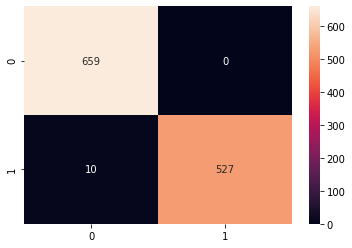

In [ ]:
# for confusion matrix... 0 for attacked graph 1 for attackfree graph

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sn
cm = confusion_matrix(actual, predicted)



sn.heatmap(cm, annot=True, fmt = "")


In [ ]:
#it gives the all score regarding the system

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(actual, predicted, digits = 5))


              precision    recall  f1-score   support

         0.0    0.98505   1.00000   0.99247       659
         1.0    1.00000   0.98138   0.99060       537

    accuracy                        0.99164      1196
   macro avg    0.99253   0.99069   0.99154      1196
weighted avg    0.99176   0.99164   0.99163      1196

